In [51]:
import json
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

import seaborn as sns
from scipy.optimize import minimize
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from dateutil.relativedelta import relativedelta

In [2]:
data = pd.read_csv('returns.csv', index_col = 0)
data.index = pd.to_datetime(data.index)
data = data[1:]
data.head()

,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-04,-0.076389,-0.084310,NaN,NaN,-0.028572,-0.005435,NaN,-0.083889,-0.050589,-0.010416,...,NaN,-0.037568,NaN,0.023026,-0.019153,NaN,-0.020101,NaN,-0.014428,NaN
2000-01-05,-0.062030,0.014633,NaN,NaN,-0.001838,0.092896,NaN,0.019771,0.014598,-0.015790,...,NaN,0.052975,NaN,0.038585,0.054515,NaN,0.005129,NaN,0.019144,NaN
2000-01-06,-0.038077,-0.086539,NaN,NaN,0.034991,-0.010000,NaN,0.008163,-0.027337,0.005347,...,NaN,0.046778,NaN,-0.009288,0.051697,NaN,-0.008503,NaN,-0.054144,NaN
2000-01-07,0.083334,0.047369,NaN,NaN,0.010676,0.055556,NaN,0.048583,0.028106,0.015958,...,NaN,-0.032883,NaN,0.000000,-0.002934,NaN,-0.022299,NaN,-0.011098,NaN
2000-01-10,0.060577,-0.017588,NaN,NaN,-0.007042,0.033493,NaN,0.038610,0.087051,0.000000,...,NaN,-0.004359,NaN,0.000000,-0.013981,NaN,0.040350,NaN,0.033668,NaN


In [3]:
# data.isnull().values.any()
cols_with_nan = data.columns[data.isna().any()] 
cols_with_nan

Index(['ABBV', 'ABNB', 'ACN', 'AIZ', 'ALGN', 'ALLE', 'AMCR', 'AMP', 'ANET',
       'APO',
       ...
       'VLTO', 'VRSK', 'VST', 'WBD', 'WDAY', 'WTW', 'WYNN', 'XYL', 'ZBH',
       'ZTS'],
      dtype='object', length=148)

In [4]:
data = data.dropna(axis=1, how="any")
data

,A,AAPL,ABT,ACGL,ADBE,ADI,ADM,ADP,ADSK,AEE,...,WM,WMB,WMT,WRB,WST,WY,XEL,XOM,YUM,ZBRA
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-04,-0.076389,-0.084310,-0.028572,-0.005435,-0.083889,-0.050589,-0.010416,0.000000,-0.048689,0.000000,...,-0.003597,-0.022178,-0.037418,-0.030770,0.010331,-0.037568,0.023026,-0.019153,-0.020101,-0.014428
2000-01-05,-0.062030,0.014633,-0.001838,0.092896,0.019771,0.014598,-0.015790,-0.009615,-0.062992,0.038684,...,0.003610,0.061856,-0.020408,-0.015873,-0.004091,0.052975,0.038585,0.054515,0.005129,0.019144
2000-01-06,-0.038077,-0.086539,0.034991,-0.010000,0.008163,-0.027337,0.005347,0.013349,-0.060924,-0.003724,...,-0.007194,0.021359,0.010913,0.058065,-0.010267,0.046778,-0.009288,0.051697,-0.008503,-0.054144
2000-01-07,0.083334,0.047369,0.010676,0.055556,0.048583,0.028106,0.015958,0.022755,0.118568,0.014953,...,-0.039855,0.026616,0.075564,-0.015244,0.010373,-0.032883,0.000000,-0.002934,-0.022299,-0.011098
2000-01-10,0.060577,-0.017588,-0.007042,0.033493,0.038610,0.087051,0.000000,0.024590,-0.010099,-0.007366,...,0.003774,-0.018519,-0.018248,-0.009288,0.020534,-0.004359,0.000000,-0.013981,0.040350,0.033668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,0.004534,-0.005547,0.005070,-0.004315,-0.002316,0.004178,0.007472,0.008647,0.003597,-0.000416,...,0.000792,0.004861,0.011951,0.006451,0.003307,0.007329,0.008614,0.001769,0.000154,0.015454
2023-12-26,0.001719,-0.002841,0.001834,-0.004469,-0.000818,0.008980,0.013014,0.006797,0.009516,-0.004163,...,0.003221,-0.000569,-0.001532,-0.001567,0.006790,0.007858,0.003062,0.002257,0.002000,0.022605
2023-12-27,0.000072,0.000518,0.005127,0.000408,-0.003644,0.002414,-0.003039,-0.003999,0.000163,-0.000975,...,0.001296,-0.002563,0.009398,-0.000713,-0.004086,0.003754,-0.003078,-0.004699,0.004453,0.001053


## TODO: are returns in excess returns?

In [22]:
start = data.index[0]
start
end = start + relativedelta(months = 36)
start, end

(Timestamp('2000-01-04 00:00:00'), Timestamp('2003-01-04 00:00:00'))

In [23]:
monthly_dates = data.resample("MS").last().index
monthly_dates

DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01',
               '2000-09-01', '2000-10-01',
               ...
               '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01',
               '2023-07-01', '2023-08-01', '2023-09-01', '2023-10-01',
               '2023-11-01', '2023-12-01'],
              dtype='datetime64[ns]', name='Date', length=288, freq='MS')

In [30]:
from pandas.tseries.offsets import MonthEnd
winnerLosers = pd.DataFrame()

for month in monthly_dates[37:]:
    end = month
    beg = month - relativedelta(months = 37)
    returns36month = data[(data.index >= beg) & (data.index < end)]
    returns36month = returns36month + 1
    cum36 = returns36month.prod() - 1

    winnerLosers[month] = cum36

winnerLosers = winnerLosers.T


/var/folders/bc/hnzwjdn546lcc572zg36k_vc0000gn/T/ipykernel_50660/1399511618.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  winnerLosers[month] = cum36


In [31]:
winnerLosers

,A,AAPL,ABT,ACGL,ADBE,ADI,ADM,ADP,ADSK,AEE,...,WM,WMB,WMT,WRB,WST,WY,XEL,XOM,YUM,ZBRA
2003-02-01,-0.771111,-0.743428,0.158968,1.653912,-0.190522,-0.469328,0.163731,-0.315551,-0.081550,0.474059,...,0.324984,-0.876717,-0.273223,2.021898,-0.306915,-0.241318,-0.298033,-0.066679,0.242479,-0.008036
2003-03-01,-0.800567,-0.710650,0.158332,1.137436,0.003239,-0.376256,0.080429,-0.296681,-0.029107,0.450096,...,0.138705,-0.881928,-0.108276,2.658966,-0.319302,-0.048005,-0.302749,-0.115458,0.663581,0.065766
2003-04-01,-0.873405,-0.753283,0.206830,1.225574,-0.392604,-0.650238,0.244836,-0.271535,-0.300705,0.602217,...,0.413940,-0.870445,0.086073,3.187292,-0.268570,0.021339,-0.117221,-0.005602,0.827605,-0.032488
2003-05-01,-0.845962,-0.790593,0.230202,1.122138,-0.376775,-0.588571,0.246149,-0.283095,-0.298337,0.593723,...,0.589029,-0.813488,0.013090,2.135004,0.045031,-0.039055,-0.176699,-0.032996,0.590342,0.333400
2003-06-01,-0.795430,-0.710630,0.228674,1.404062,-0.413252,-0.498128,0.404787,-0.332925,-0.202295,0.492173,...,0.594061,-0.751285,-0.034420,2.629622,0.132808,0.042556,-0.160964,0.011145,0.650775,0.280175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,0.404287,1.193984,0.284532,1.711693,0.254669,0.717720,1.282472,0.765370,-0.113717,0.319934,...,0.626614,1.168276,0.398849,0.705209,0.632018,0.732905,0.092011,1.809223,0.672404,0.203204
2023-09-01,0.280841,0.803225,0.074443,1.499512,0.258868,0.671057,0.995244,1.036410,-0.061287,0.070945,...,0.504576,1.160815,0.321811,0.586407,0.523583,0.353475,-0.099683,2.120806,0.507262,-0.020445
2023-10-01,0.134801,0.350781,-0.070299,1.527267,-0.006798,0.580945,0.801071,0.847902,-0.157875,0.033616,...,0.412803,0.968511,0.206587,0.635656,0.330264,0.162589,-0.095758,2.409713,0.375916,-0.174502
2023-11-01,0.045746,0.501224,-0.081987,1.963419,0.084885,0.422288,0.645530,0.660267,-0.144496,0.039609,...,0.526844,1.083128,0.223502,0.759102,0.165652,0.156168,-0.063006,2.571161,0.397315,-0.170443


In [ ]:

np.floor(len(winnerLosers.iloc[0]) * 0.10)

35.0

In [44]:
import math

def top10_long_short_equal_weight(row):
    ten_percent = math.floor(len(row) * 0.10)
    top = row.nlargest(ten_percent).index
    bot = row.nsmallest(ten_percent).index
    weight = pd.Series(0, index = row.index)
    weight[top] = -1 / ten_percent
    weight[bot] = 1 / ten_percent
    return weight

In [45]:
weights = winnerLosers.apply(top10_long_short_equal_weight, axis = 1)
weights

,A,AAPL,ABT,ACGL,ADBE,ADI,ADM,ADP,ADSK,AEE,...,WM,WMB,WMT,WRB,WST,WY,XEL,XOM,YUM,ZBRA
2003-02-01,0.028571,0.028571,0.0,-0.028571,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.028571,0.0,-0.028571,0.0,0.0,0.0,0.000000,0.0,0.000000
2003-03-01,0.028571,0.028571,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.028571,0.0,-0.028571,0.0,0.0,0.0,0.000000,0.0,0.000000
2003-04-01,0.028571,0.028571,0.0,-0.028571,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.028571,0.0,-0.028571,0.0,0.0,0.0,0.000000,0.0,0.000000
2003-05-01,0.028571,0.028571,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.028571,0.0,-0.028571,0.0,0.0,0.0,0.000000,0.0,0.000000
2003-06-01,0.028571,0.028571,0.0,-0.028571,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.028571,0.0,-0.028571,0.0,0.0,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,0.000000,0.000000,0.0,-0.028571,0.0,0.0,0.0,0.0,0.028571,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,-0.028571,0.0,0.000000
2023-09-01,0.000000,0.000000,0.0,-0.028571,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,-0.028571,0.0,0.000000
2023-10-01,0.000000,0.000000,0.0,-0.028571,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,-0.028571,0.0,0.000000
2023-11-01,0.000000,0.000000,0.0,-0.028571,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,-0.028571,0.0,0.000000


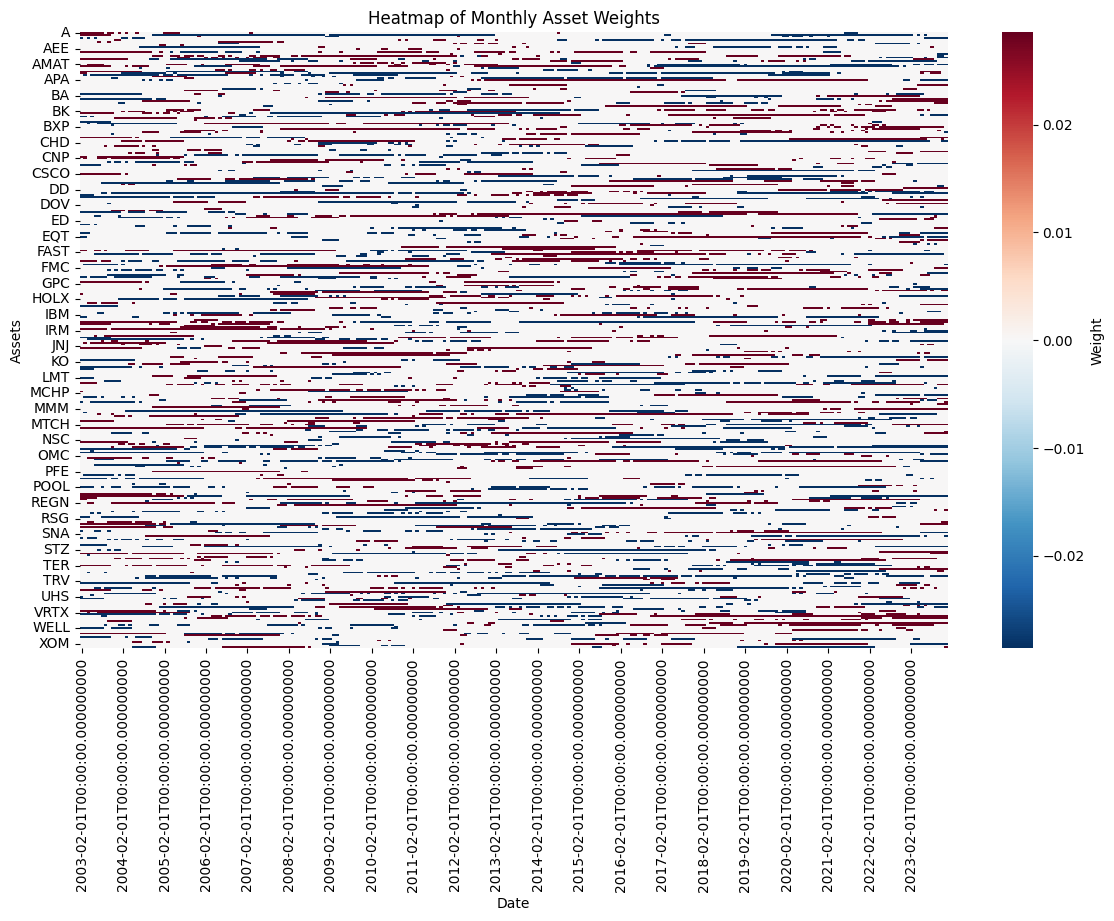

In [ ]:

assets = weights.iloc[0].index

plt.figure(figsize=(14,8))
sns.heatmap(weights[assets].T,
    cmap='RdBu_r',
    cbar_kws={'label':'Weight'},
    xticklabels=12,
    # yticklabels=False
)
plt.xlabel('Date')
plt.ylabel('Assets')
plt.title('Heatmap of Monthly Asset Weights')
plt.show()



In [62]:
portfolio = pd.DataFrame()

for month in weights.index:
    beg = month
    end = beg + MonthEnd(0)
    ret_month = data.loc[beg:end] # filter the monthly returns for this period
    cum_month = (1 + ret_month).cumprod() # compute cum returns (no daily rebalancing)

    # adjust for equal weights in first trading day of month
    cum_month= cum_month.shift(1)
    cum_month.iloc[0] = 1

    ini_weight = weights.loc[month] # get initial weights for the period
    month_weights = cum_month.multiply(ini_weight, axis=1)
    
    ret_portfolio = (month_weights * ret_month).sum(axis = 1)
    portfolio = pd.concat([portfolio, ret_portfolio])
    
portfolio.columns = ["Portfolio Return"]
portfolio

,Portfolio Return
2003-02-03,-0.003917
2003-02-04,-0.010744
2003-02-05,-0.002774
2003-02-06,-0.006713
2003-02-07,-0.000130
...,...
2023-12-22,0.001848
2023-12-26,0.000247
2023-12-27,0.003742
2023-12-28,0.012113


<Axes: >

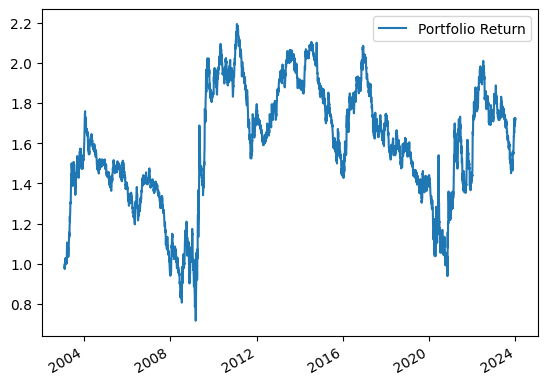

In [63]:
cum_returns = (1 + portfolio).cumprod()
cum_returns.plot()

In [64]:
mupor = portfolio.mean() * 252
sdpor = portfolio.std() * np.sqrt(252)
srpor = mupor / sdpor

print(f"Mu: {mupor[0]}")
print(f"Std: {sdpor[0]}")
print(f"Sharpe: {srpor[0]}")

Mu: 0.04905871580926301
Std: 0.21569916265466588
Sharpe: 0.22744045551908773
